# **d) DB Scan Clustering (not from scratch) using pycaret Library**

**Install pycaret**

In [1]:
!pip3 install pycaret

     |████████████████████████████████| 288 kB 5.5 MB/s 
     |████████████████████████████████| 6.8 MB 39.5 MB/s 
     |████████████████████████████████| 167 kB 52.4 MB/s 
     |████████████████████████████████| 1.7 MB 59.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 113 kB 47.6 MB/s 
     |████████████████████████████████| 261 kB 48.3 MB/s 
     |████████████████████████████████| 16.9 MB 47.7 MB/s 
     |████████████████████████████████| 2.0 MB 61.9 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 1.3 MB 27.1 MB/s 
     |████████████████████████████████| 10.1 MB 47.8 MB/s 
     |████████████████████████████████| 62 kB 737 kB/s 
     |████████████████████████████████| 102 kB 10.5 MB/s 
     |██████████████████

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


**Load the dataset**

In [3]:
from pycaret.datasets import get_data
dataset = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [4]:
#check the shape of data
dataset.shape

(1080, 82)

In [40]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1026, 82)
Unseen Data For Predictions: (54, 82)


In [41]:
from pycaret.clustering import *

**Set up environment in pycaret**

In [42]:
exp_clu101 = setup(data, normalize = True, ignore_features = ['MouseID'], session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(1026, 82)"
2,Missing Values,True
3,Numeric Features,77
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1026, 91)"
9,CPU Jobs,-1


**Create the model**

In [54]:
dbscan = create_model('dbscan', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [55]:
print(dbscan)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)


**Assign the model**

In [56]:
kmean_results = assign_model(dbscan)
kmean_results.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster
0,3501_12,0.344930,0.626194,0.383583,2.534561,4.097317,0.303547,0.222829,4.592769,0.239427,1.360164,0.339472,0.360164,0.333788,0.335380,0.926330,0.827876,1.839700,1.256708,0.459982,0.871305,0.298317,0.467030,0.219873,1.283765,2.598454,1.177126,0.287176,0.331060,0.793543,0.195771,0.512051,2.261255,0.815598,0.483856,0.503638,0.893815,0.732378,0.438154,0.720327,...,0.350387,0.188809,0.880156,0.160182,1.521666,0.300325,0.642811,1.414053,0.339493,0.352115,0.201952,0.140664,0.187638,0.223943,0.327651,0.124528,0.182824,0.112687,0.676122,0.331685,1.510345,2.378920,0.192453,1.897202,0.962785,0.283409,0.150683,0.163175,0.140664,0.151464,0.455172,0.252700,0.218868,0.249187,1.139493,Ts65Dn,Memantine,S/C,t-SC-m,Cluster -1
1,3520_5,0.630001,0.839187,0.357777,2.651229,4.261675,0.253184,0.185257,3.816673,0.204940,1.716583,0.825807,0.338737,0.403705,0.305030,0.881256,0.697285,1.691368,2.214460,0.561688,0.680690,0.598482,0.358163,0.182040,1.273125,2.754664,1.506497,0.258459,0.288820,0.837643,0.167246,0.416699,2.310305,0.324585,0.451692,0.408079,0.773061,0.510485,0.373086,0.628586,...,0.455680,0.209459,1.134340,0.169316,2.388911,0.310546,0.683029,1.580882,0.274112,0.152557,0.171966,0.135334,0.166534,0.228140,0.263447,0.125729,0.235493,0.124735,0.569356,0.327636,1.964494,2.422032,0.151100,1.286831,1.022523,0.228736,0.151166,0.107909,0.135334,0.109897,0.496423,0.155008,0.153219,NaN,1.642886,Control,Memantine,C/S,c-CS-m,Cluster -1
2,3414_13,0.555122,0.726229,0.278319,2.097249,2.897553,0.222222,0.174356,1.867880,0.203379,1.610136,0.686593,0.259692,0.306043,0.239116,0.680745,0.385532,1.213775,1.433398,0.454191,0.499025,0.617934,0.315789,0.187568,0.800520,1.991553,1.323587,0.248213,0.246047,0.736409,0.172623,0.412606,1.916613,0.316223,0.365389,0.285034,0.602339,0.176522,0.289149,0.268789,...,0.444011,0.144503,0.800527,0.164417,1.922153,0.247202,0.319454,0.748190,0.143680,0.144997,0.156353,0.104839,0.144338,0.158492,0.184661,0.104016,0.195523,0.101876,0.435813,0.272383,1.195523,2.536537,0.140882,1.004773,0.936307,0.200790,0.152732,NaN,0.104839,NaN,0.344964,0.136109,0.155530,0.185484,1.657670,Ts65Dn,Memantine,C/S,t-CS-m,Cluster -1
3,3488_8,0.275849,0.430764,0.285166,2.265254,3.250091,0.189258,0.157837,2.917611,0.202594,1.734746,0.321703,0.262148,0.262696,0.229083,0.763062,0.744428,1.607782,1.037998,0.378882,0.767994,0.245342,0.365181,0.155645,1.199854,2.045305,0.900804,0.214468,0.228718,0.580197,0.153453,0.350018,2.036536,1.012788,0.477347,0.513336,0.723054,0.540921,0.362258,0.630252,...,0.386555,0.154218,0.813469,0.133884,0.986310,0.225388,0.268673,0.917556,0.108516,0.140125,0.151299,0.123415,0.148581,0.165895,0.163479,0.111033,0.236964,0.110630,0.526676,0.259211,1.226696,2.146165,0.164586,1.065331,0.704349,0.247332,0.142138,0.126636,0.123415,0.147373,0.390880,0.127944,0.207671,0.175357,0.893598,Control,Saline,S/C,c-SC-s,Cluster -1
4,3501_7,0.304788,0.617299,0.335164,2.638236,4.876609,0.280590,0.199417,4.835421,0.236314,1.226532,0.309765,0.365711,0.336537,0.318689,0.902351,0.805389,1.845203,1.380470,0.438476,0.929810,0.270808,0.433499,0.190836,1.308907,2.981122,1.155140,0.265145,0.294148,0.801785,0.181397,0.466793,2.484984,0.765402,0.465076,0.458212,0.904925,0.689720,0.392826,0.672044,...,0.387850,0.189124,1.029642,0.154055,1.403507,0.281599,0.565285,1.266361,0.366559,0.151759,0.182966,0.149567,0.181923,0.217096,0.301743,0.112619,0.205511,0.11209

**Plot the model**

In [58]:
plot_model(dbscan, plot = 'cluster')

# Apply DBSCAN using sklearn to non-spherical data

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


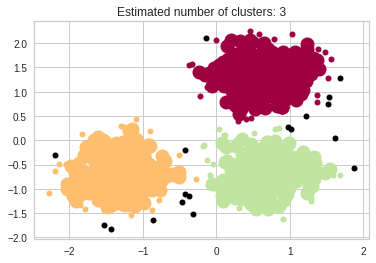

In [64]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Apply DBSCAN using sklearn to spherical data

Number of clusters: 4
Homogeneity: 0.9895996412536262
Completeness: 0.6321116948865249
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: -0.043


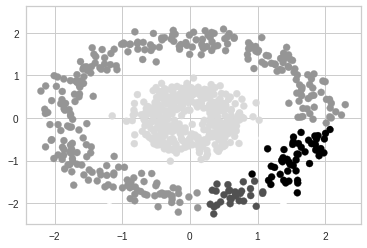

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))